In [29]:
import cv2
import numpy as np
from pathlib import Path
from EvEye.utils.visualization.visualization import *
import matplotlib.pyplot as plt
from natsort import natsorted

In [30]:
root_path = Path(
    "/mnt/data2T/junyuan/eye-tracking/outputs/EventMasks/user1_left_session_1_0_1"
)

In [31]:
def get_masks(root_path):
    masks = []
    for file in root_path.iterdir():
        if file.suffix == ".png":
            if file.stem.split("_")[-1] == "mask":
                masks.append(file)
    return natsorted(masks)

In [32]:
def draw_ellipse(canvas, ellipse):
    """
    在给定的画布上绘制椭圆及其特征点。

    参数:
    canvas: 要绘制的画布
    ellipse: cv2.fitEllipse 返回的椭圆参数
    """
    # 获取椭圆参数
    center = ellipse[0]  # 椭圆中心 (x, y)
    axes = ellipse[1]  # 长轴和短轴 (长轴, 短轴)
    angle = ellipse[2]  # 旋转角度

    # 在画布上绘制椭圆
    cv2.ellipse(canvas, ellipse, (0, 255, 0), 1)  # 白色的椭圆

    # 计算长轴的端点
    long_axis_start = (
        int(center[0] - axes[0] / 2 * np.cos(np.radians(angle))),
        int(center[1] - axes[0] / 2 * np.sin(np.radians(angle))),
    )
    long_axis_end = (
        int(center[0] + axes[0] / 2 * np.cos(np.radians(angle))),
        int(center[1] + axes[0] / 2 * np.sin(np.radians(angle))),
    )

    # 绘制长轴
    cv2.line(canvas, long_axis_start, long_axis_end, (0, 255, 0), 1)  # 绿的长轴

    # 计算短轴的端点
    short_axis_start = (
        int(center[0] - axes[1] / 2 * np.sin(np.radians(angle))),
        int(center[1] + axes[1] / 2 * np.cos(np.radians(angle))),
    )
    short_axis_end = (
        int(center[0] + axes[1] / 2 * np.sin(np.radians(angle))),
        int(center[1] - axes[1] / 2 * np.cos(np.radians(angle))),
    )

    # 绘制短轴
    cv2.line(canvas, short_axis_start, short_axis_end, (255, 255, 0), 1)  # 黄色的短轴

    # 绘制中心点
    cv2.circle(
        canvas, (int(center[0]), int(center[1])), 2, (0, 0, 255), -1
    )  # 红色的中心点

    # 打印椭圆参数，保留两位小数
    print(
        f"椭圆中心: ({center[0]:.2f}, {center[1]:.2f}), 长轴: {axes[0]:.2f}, 短轴: {axes[1]:.2f}, 旋转角度: {angle:.2f}"
    )

In [33]:
masks = natsorted(get_masks(root_path))
mask = natsorted(masks)[5]

In [35]:
raw_image = load_image(str(mask))[0]
gray_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)
contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
canvas = np.zeros_like(raw_image)
for contour in contours:
    if len(contour) > 5:
        ellipse = cv2.fitEllipse(contour)
        draw_ellipse(canvas, ellipse)
        print(ellipse)
        print(type(ellipse))
        print(len(ellipse))

椭圆中心: (184.51, 139.14), 长轴: 41.00, 短轴: 48.12, 旋转角度: 82.49
((184.5068359375, 139.13592529296875), (41.00020980834961, 48.12195587158203), 82.49444580078125)
<class 'tuple'>
3


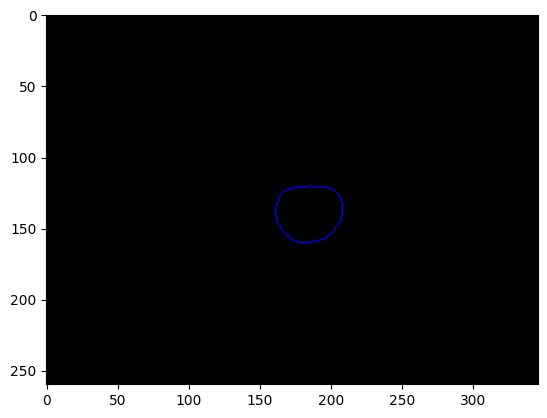

In [36]:
plt.imshow(raw_image)

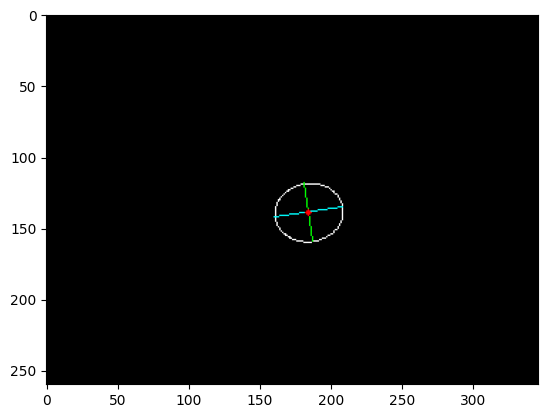

In [37]:
canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)
plt.imshow(canvas)

In [38]:
ellipse

((184.5068359375, 139.13592529296875),
 (41.00020980834961, 48.12195587158203),
 82.49444580078125)